In [1]:
%matplotlib inline
import os
import sys
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import xarray as xr

In [2]:
import salem

In [3]:
from glob import glob

### past 4 months, 7 days chunks 

In [4]:
lfiles = glob('/Volumes/GDATA/data/CRW/BAA7dMAX/*.nc')

In [5]:
lfiles.sort()

In [6]:
lfiles

['/Volumes/GDATA/data/CRW/BAA7dMAX/b5km_baa-max-7d_20170814.nc',
 '/Volumes/GDATA/data/CRW/BAA7dMAX/b5km_baa-max-7d_20170821.nc',
 '/Volumes/GDATA/data/CRW/BAA7dMAX/b5km_baa-max-7d_20170828.nc',
 '/Volumes/GDATA/data/CRW/BAA7dMAX/b5km_baa-max-7d_20170904.nc',
 '/Volumes/GDATA/data/CRW/BAA7dMAX/b5km_baa-max-7d_20170911.nc',
 '/Volumes/GDATA/data/CRW/BAA7dMAX/b5km_baa-max-7d_20170918.nc',
 '/Volumes/GDATA/data/CRW/BAA7dMAX/b5km_baa-max-7d_20170925.nc',
 '/Volumes/GDATA/data/CRW/BAA7dMAX/b5km_baa-max-7d_20171002.nc',
 '/Volumes/GDATA/data/CRW/BAA7dMAX/b5km_baa-max-7d_20171009.nc',
 '/Volumes/GDATA/data/CRW/BAA7dMAX/b5km_baa-max-7d_20171016.nc',
 '/Volumes/GDATA/data/CRW/BAA7dMAX/b5km_baa-max-7d_20171023.nc',
 '/Volumes/GDATA/data/CRW/BAA7dMAX/b5km_baa-max-7d_20171030.nc',
 '/Volumes/GDATA/data/CRW/BAA7dMAX/b5km_baa-max-7d_20171106.nc',
 '/Volumes/GDATA/data/CRW/BAA7dMAX/b5km_baa-max-7d_20171113.nc',
 '/Volumes/GDATA/data/CRW/BAA7dMAX/b5km_baa-max-7d_20171120.nc',
 '/Volumes/GDATA/data/CRW

### reads in the BAA 7 days max

In [7]:
BAA = xr.open_mfdataset(lfiles)

In [8]:
BAA

<xarray.Dataset>
Dimensions:        (lat: 3600, lon: 7200, time: 18)
Coordinates:
  * lat            (lat) float32 89.975 89.925 89.875 89.825 89.775 89.725 ...
  * lon            (lon) float32 -179.975 -179.925 -179.875 -179.825 ...
  * time           (time) datetime64[ns] 2017-08-14T12:00:00 ...
Data variables:
    surface_flag   (time, lat, lon) int8 dask.array<shape=(18, 3600, 7200), chunksize=(1, 3600, 7200)>
    CRW_BAA_max7d  (time, lat, lon) float64 dask.array<shape=(18, 3600, 7200), chunksize=(1, 3600, 7200)>
    crs            (time) int16 -32767 -32767 -32767 -32767 -32767 -32767 ...
Attributes:
    Conventions:                CF-1.6, ACDD-1.3, Unidata Observation Dataset...
    ncei_template_version:      NCEI_NetCDF_Grid_Template_v2.0
    title:                      NOAA Coral Reef Watch Daily Global 5-km Satel...
    summary:                    This is a product of NOAA Coral Reef Watch da...
    references:                 Liu, G, Heron SF, Eakin CM, Muller-Karger FE,...

### calculates the max over time

In [9]:
BAA = BAA.max('time')

In [10]:
BAA

<xarray.Dataset>
Dimensions:        (lat: 3600, lon: 7200)
Coordinates:
  * lat            (lat) float32 89.975 89.925 89.875 89.825 89.775 89.725 ...
  * lon            (lon) float32 -179.975 -179.925 -179.875 -179.825 ...
Data variables:
    surface_flag   (lat, lon) int8 dask.array<shape=(3600, 7200), chunksize=(3600, 7200)>
    CRW_BAA_max7d  (lat, lon) float64 dask.array<shape=(3600, 7200), chunksize=(3600, 7200)>
    crs            int16 -32767

### goes from 0 to 360 

In [11]:
BAA_rolled = BAA.assign_coords(lon=(BAA.lon % 360)).roll(lon=(BAA.dims['lon'] // 2))

/Users/nicolasf/anaconda/envs/IOOS/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:343: RuntimeWarning: All-NaN slice encountered
  warnings.warn("All-NaN slice encountered", RuntimeWarning)


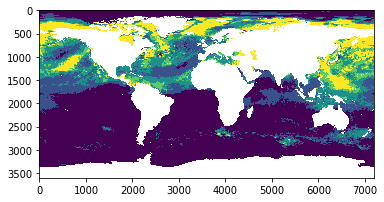

In [12]:
plt.imshow(BAA['CRW_BAA_max7d'].data)

/Users/nicolasf/anaconda/envs/IOOS/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:343: RuntimeWarning: All-NaN slice encountered
  warnings.warn("All-NaN slice encountered", RuntimeWarning)


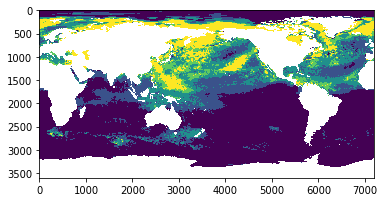

In [13]:
plt.imshow(BAA_rolled['CRW_BAA_max7d'].data)

In [14]:
BAA_rolled = BAA_rolled.sel(lon=slice(100, 300), lat=slice(50, -50))

/Users/nicolasf/anaconda/envs/IOOS/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:343: RuntimeWarning: All-NaN slice encountered
  warnings.warn("All-NaN slice encountered", RuntimeWarning)


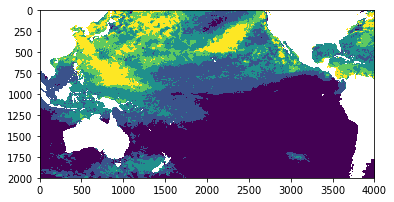

In [15]:
plt.imshow(BAA_rolled['CRW_BAA_max7d'].data)

In [16]:
BAA.close()

### loads in memory

In [17]:
BAA_rolled.load()

/Users/nicolasf/anaconda/envs/IOOS/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:343: RuntimeWarning: All-NaN slice encountered
  warnings.warn("All-NaN slice encountered", RuntimeWarning)


<xarray.Dataset>
Dimensions:        (lat: 2000, lon: 4000)
Coordinates:
  * lat            (lat) float32 49.975 49.925 49.875 49.825 49.775 49.725 ...
  * lon            (lon) float32 100.025 100.075 100.125 100.175 100.225 ...
Data variables:
    surface_flag   (lat, lon) int8 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...
    CRW_BAA_max7d  (lat, lon) float64 nan nan nan nan nan nan nan nan nan ...
    crs            int16 -32767

### reads in the masks

In [18]:
masks = xr.open_dataset('../data/reef_mask/compiled_5km_reef_mask_for_edit_20171113_buffer4pix.nc')

In [19]:
masks

<xarray.Dataset>
Dimensions:    (lat: 3600, lon: 7200)
Coordinates:
  * lon        (lon) float32 -179.975 -179.925 -179.875 -179.825 -179.775 ...
  * lat        (lat) float32 89.975 89.925 89.875 89.825 89.775 89.725 ...
Data variables:
    reef_mask  (lat, lon) uint8 ...
    land_mask  (lat, lon) uint8 ...

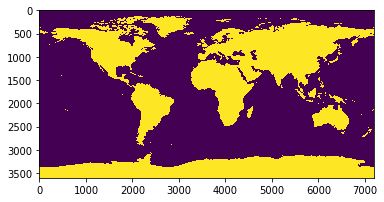

In [20]:
plt.imshow(masks['land_mask'].data)

In [21]:
masks_rolled = masks.assign_coords(lon=(masks.lon % 360)).roll(lon=(masks.dims['lon'] // 2))

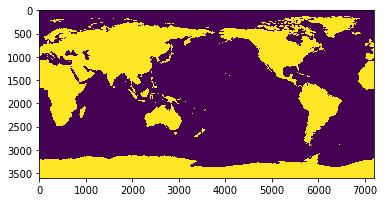

In [22]:
plt.imshow(masks_rolled['land_mask'].data)

In [23]:
land_mask = ~(masks_rolled['land_mask'].data.astype(np.bool))

In [24]:
land_mask = land_mask.astype(np.float32)

In [25]:
land_mask

array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

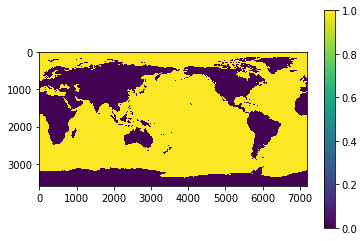

In [26]:
plt.imshow(land_mask); plt.colorbar()

In [27]:
masks_rolled['land_mask'] = (('lat','lon'), land_mask)

In [28]:
masks_rolled = masks_rolled.sel(lon=slice(100, 300), lat=slice(50, -50))

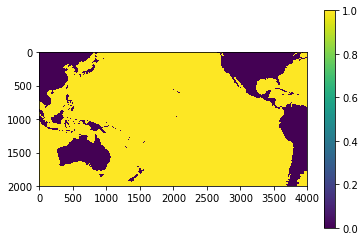

In [29]:
plt.imshow(masks_rolled['land_mask'].data); plt.colorbar()

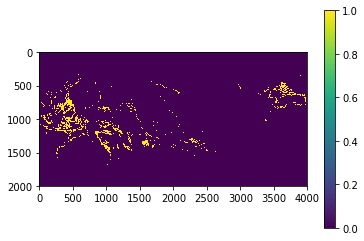

In [30]:
plt.imshow(masks_rolled['reef_mask'].data); plt.colorbar()

In [31]:
mask = masks_rolled['reef_mask'] * masks_rolled['land_mask']

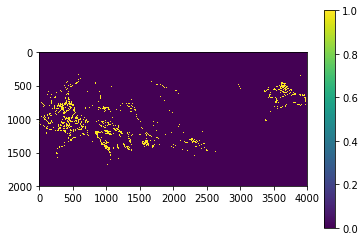

In [32]:
plt.imshow(mask); plt.colorbar()

In [33]:
mask_data = mask.data

In [34]:
mask_data[np.where(mask_data == 0)] = np.nan

In [35]:
BAA_rolled['reef_mask'] = (('lat','lon'), mask_data)

In [36]:
if os.path.exists('../outputs/tmp.nc'):
    os.remove('../outputs/tmp.nc')

In [37]:
BAA_rolled.to_netcdf('../outputs/tmp.nc')

### reads the EEZ shapefile

In [38]:
shp_path = "/Users/nicolasf/drives/auck_projects/ICU14101/Working/ICU Water Watch/GIS map files"

In [39]:
shp = salem.read_shapefile(os.path.join(shp_path, "ALL_ICU_countries.shp"))

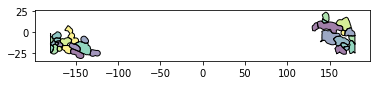

In [40]:
shp.plot()

In [41]:
shp.head()

,ACP,COUNTRYNAM,COUNTRY_ID,FFA,FORUM,ICU,SOPAC,SPC,SPREP,Stress,TCSP,USP,area,geometry,min_x,max_x,min_y,max_y
0,0,New Caledonia,NC,0,0,2,0,0,0,-14,0,0,0.0,"POLYGON ((158.6108 -25.14667, 157.8011 -23.248...",156.255600,170.033300,-25.919891,-14.769438
1,0,Pitcairn Islands,PN,0,0,-3,0,0,0,0,0,0,0.0,"POLYGON ((-132.499382 -22.511733, -132.228513 ...",-133.405666,-121.133705,-28.385089,-20.530577
2,0,Papua New Guinea,PG,0,0,0,0,0,0,7,0,0,0.0,"POLYGON ((157.168058 -13.692712, 157.038334 -1...",139.200227,162.801941,-14.750038,2.591944
3,0,Solomon Islands,SB,0,0,-9,0,0,0,2,0,0,0.0,"POLYGON ((173.5906 -11.85417, 173.525754 -12.5...",154.585556,173.590600,-16.133050,-4.142221
4,0,Kiribati: Phoenix Islands,KI,0,0,-5,0,0,0,-1,0,0,0.0,"POLYGON ((-168.921636 -6.882211000000032, -170...",-177.883300,-167.366700,-7.785231,0.583333


In [42]:
dset_salem = salem.open_xr_dataset('../outputs/tmp.nc')

In [43]:
dset_salem

<xarray.Dataset>
Dimensions:        (lat: 2000, lon: 4000)
Coordinates:
  * lat            (lat) float32 49.975 49.925 49.875 49.825 49.775 49.725 ...
  * lon            (lon) float32 100.025 100.075 100.125 100.175 100.225 ...
Data variables:
    surface_flag   (lat, lon) int8 ...
    CRW_BAA_max7d  (lat, lon) float64 ...
    crs            int16 ...
    reef_mask      (lat, lon) float32 ...
Attributes:
    pyproj_srs:  +units=m +proj=latlong +datum=WGS84 

In [77]:
len(shp.COUNTRYNAM.unique())

29

In [45]:
country_name = 'New Caledonia'

In [46]:
sh_country = shp.query("COUNTRYNAM == '{}'".format(country_name))

In [47]:
sh_country

,ACP,COUNTRYNAM,COUNTRY_ID,FFA,FORUM,ICU,SOPAC,SPC,SPREP,Stress,TCSP,USP,area,geometry,min_x,max_x,min_y,max_y
0,0,New Caledonia,NC,0,0,2,0,0,0,-14,0,0,0.0,"POLYGON ((158.6108 -25.14667, 157.8011 -23.248...",156.2556,170.0333,-25.919891,-14.769438


In [48]:
sh_country.to_file('../shapefiles/shapes_{}'.format(country_name))

In [49]:
import fiona

In [50]:
sh_country = fiona.open('../shapefiles/shapes_{}'.format(country_name))

In [51]:
with fiona.open('../shapefiles/shapes_{}_converted.shp'.format(country_name), 'w', 'ESRI Shapefile', sh_country.schema.copy(), crs = sh_country.crs) as output:
    for shape in sh_country:
        if shape['properties']['min_x'] < 0: 
            shape['properties']['min_x'] += 360 
        if shape['properties']['max_x'] < 0: 
            shape['properties']['max_x'] += 360
        if (len(shape['geometry']['coordinates']) == 1):
            coords = shape['geometry']['coordinates']
            coords_mod = coords.copy()
            for j in range(len(coords[0])): 
                lon, lat = coords[0][j]
                if lon < 0: 
                    lon += 360
                coords_mod[0][j] = (lon, lat)
            shape['geometry']['coordinates'] = coords_mod  
        else: 
            for i in range(len(shape['geometry']['coordinates'])): 
                coords = shape['geometry']['coordinates'][i]
                coords_mod = coords.copy()
                for j in range(len(coords[0])): 
                    lon, lat = coords[0][j]
                    if lon < 0: 
                        lon += 360
                    coords_mod[0][j] = (lon, lat)
                shape['geometry']['coordinates'][i] = coords_mod  
        output.write(shape)

In [52]:
sh_country = salem.read_shapefile('../shapefiles/shapes_{}_converted.shp'.format(country_name))

In [53]:
ds_subset = dset_salem.salem.subset(shape=sh_country, margin=2)

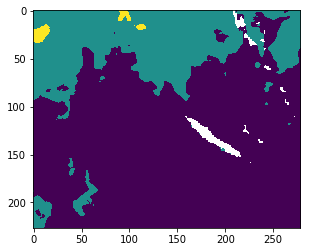

In [54]:
plt.imshow(ds_subset['CRW_BAA_max7d'].data)

In [55]:
ds_subset_roi = ds_subset.salem.roi(shape=sh_country)

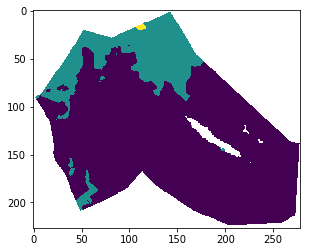

In [56]:
plt.imshow(ds_subset_roi['CRW_BAA_max7d'].data)

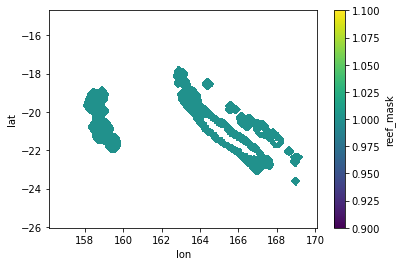

In [57]:
ds_subset_roi['reef_mask'].plot()

In [58]:
# ds_subset_roi['reef_mask'].salem.quick_map()

In [59]:
masked_roi = ds_subset_roi['CRW_BAA_max7d'] * ds_subset_roi['reef_mask']

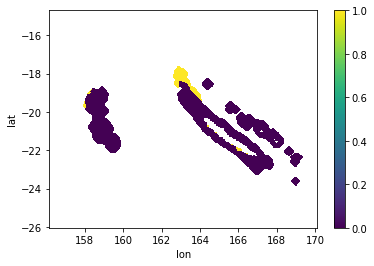

In [60]:
masked_roi.plot()

In [61]:
masked_roi = masked_roi.stack(z=('lat','lon'))

In [62]:
df = masked_roi.to_dataframe(name='masked_roi')

In [63]:
df_na = df.dropna()

In [64]:
df_na.head()

masked_roi
lat        lon                   
-17.674997 162.875000         1.0
           162.924988         1.0
-17.725000 162.825012         1.0
           162.875000         1.0
           162.924988         1.0

In [65]:
summary  = df_na.describe(percentiles=[0.1, 0.25, 0.5, 0.6, 0.7, 0.8, 0.9])

In [66]:
summary = summary.T

In [67]:
counts = pd.value_counts(df_na.iloc[:,0])

In [68]:
counts = counts.reindex(range(5))

In [69]:
counts = counts.replace(np.nan, 0)

In [70]:
counts = counts.to_frame().T

In [71]:
counts

,0,1,2,3,4
masked_roi,4329.0,318.0,0.0,0.0,0.0


In [72]:
summary = pd.concat([summary, counts], axis=1)

In [73]:
summary.index.name = "country"

In [74]:
summary.index = [country_name]

In [75]:
summary

,count,mean,std,min,10%,25%,50%,60%,70%,80%,90%,max,0,1,2,3,4
New Caledonia,4647.0,0.068431,0.252512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4329.0,318.0,0.0,0.0,0.0


In [76]:
summary.to_csv('../outputs/{}_summary.csv'.format(country_name))